<a href="https://colab.research.google.com/github/Lauralug0/GBC/blob/main/LauraLugo_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thresholding
## This notebook outlines the concepts behind Thresholding used in Image processing

Thresholding is the **binarization** of an image
- Convert a grayscale image to a binary image, where the pixels are either 0 or 255

A **simple thresholding example** would be as follows:
- selecting a pixel value p
- Setting all pixel intensities less than p to zero
- Setting all pixel values greater than p to 255

In this way, we are able to create a **binary representation** of the image

Normally, we use thresholding to focus on objects or **areas of particular interest** in an image

### Types of Thresholding
- Simple Thresholding
- Adaptive Thresholding
- Otsu and Riddler-Calvard Thresholding
- Watershed

## SIMPLE THRESHOLDING

Applying simple thresholding methods requires **human intervention**
- Specify a threshold value **T**
- All pixel intensities **below** T are set to **0**
- All pixel intensities **greater** than T are set to **255**

**Inverse Binarization**

- Setting all pixels **below** T to **255**
- Setting all pixel intensities **greater** than T to **0**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Threshold the image
- Display the image

#### Import the necessary libraries

In [6]:
import cv2
import numpy as np

#### Load the image

In [12]:
image = cv2.imread("image.jpg")

#### Convert the image into grayscale

In [13]:
if image is None:
    print("Warning: 'image' variable is None. Attempting to reload with correct filename 'image.jgp'.")
    image = cv2.imread("image.jgp")
    if image is None:
        raise ValueError("Failed to load image.jgp even after re-attempt. Please check the file.")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [14]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.threshold( )**
    - image
    - threshold value **T** (manual setting)
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Thresholding method
        - **THRESH_BINARY**
            - Pixel values greater than T are set to maximum value M
    - Returns
        - T (manually set)
        - thresholded image

In [15]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)

#### Display the thresholded image

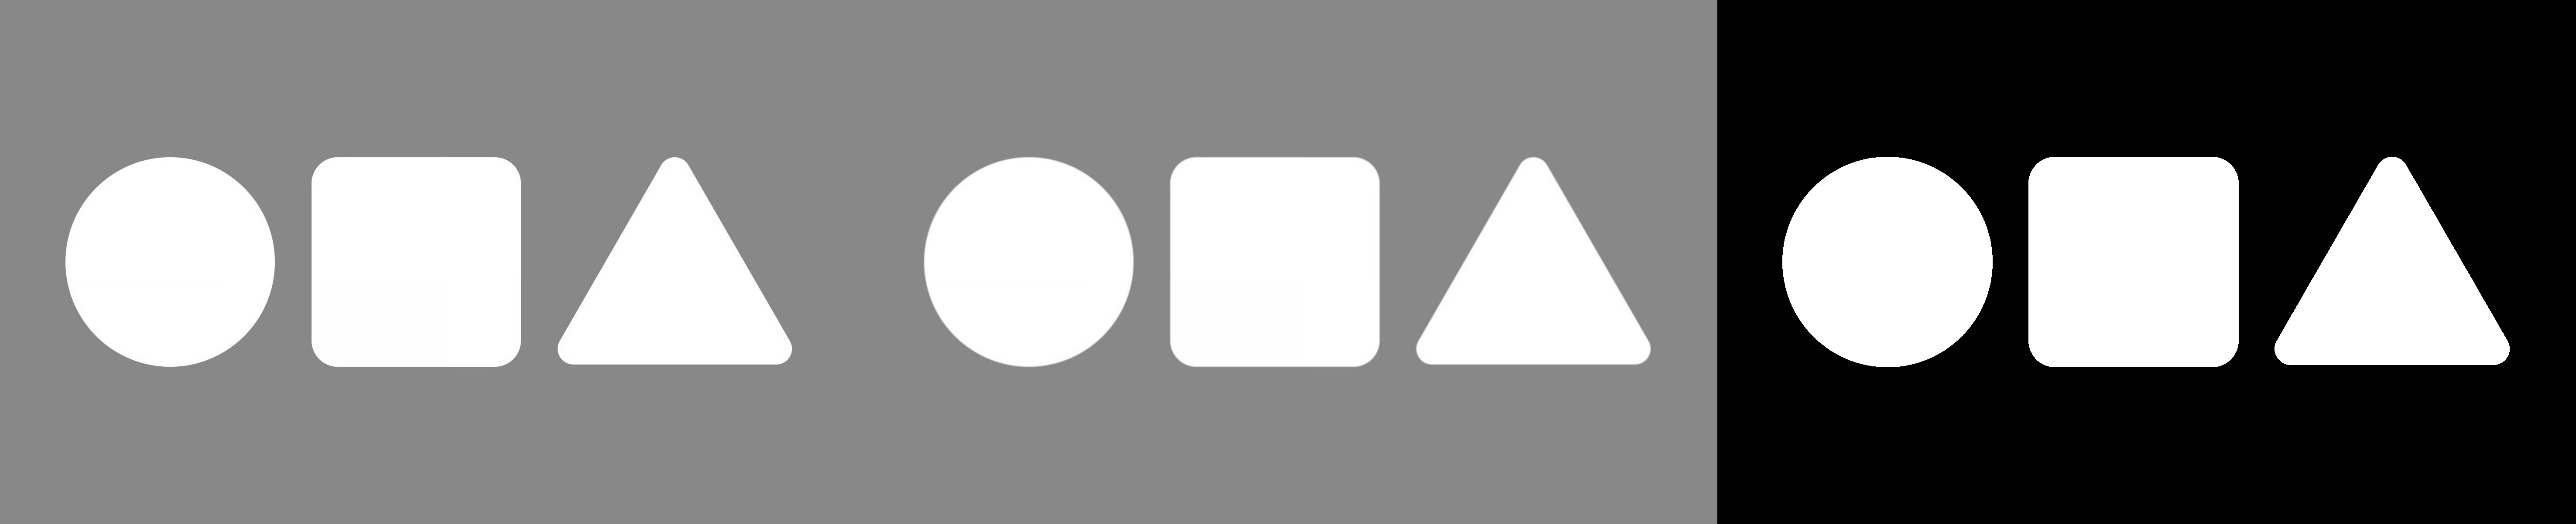

-1

In [20]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([gray, blurred, thresh]))
cv2.waitKey(0)

### Homework:
- Test whether using Blurring before Thresholding helps or not
    - Take more images
    - Run results with Blurring
    - Run results without Blurring
    - Compare and study the effects of blurring
- Also, try the other Thresholding methods
    - cv2.THRESH_TRUNC
    - cv2.THRESH_TOZERO
    - cv2.THRESH_TOZERO_INV

### Inverse Thresholding

In [21]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

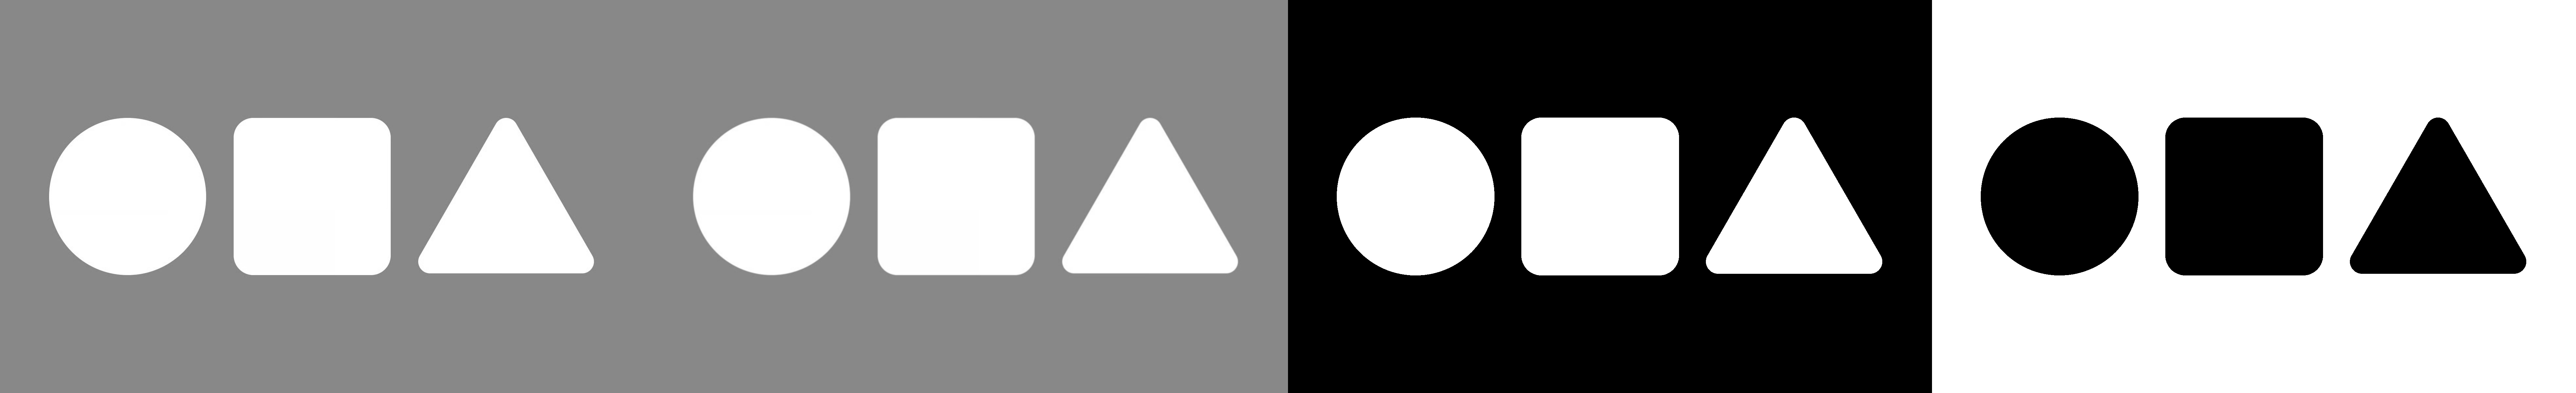

-1

In [23]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([gray, blurred, thresh, threshInv]))
cv2.waitKey(0)

### Extract the foreground

In [24]:
foreground = cv2.bitwise_and(image, image, mask = threshInv)

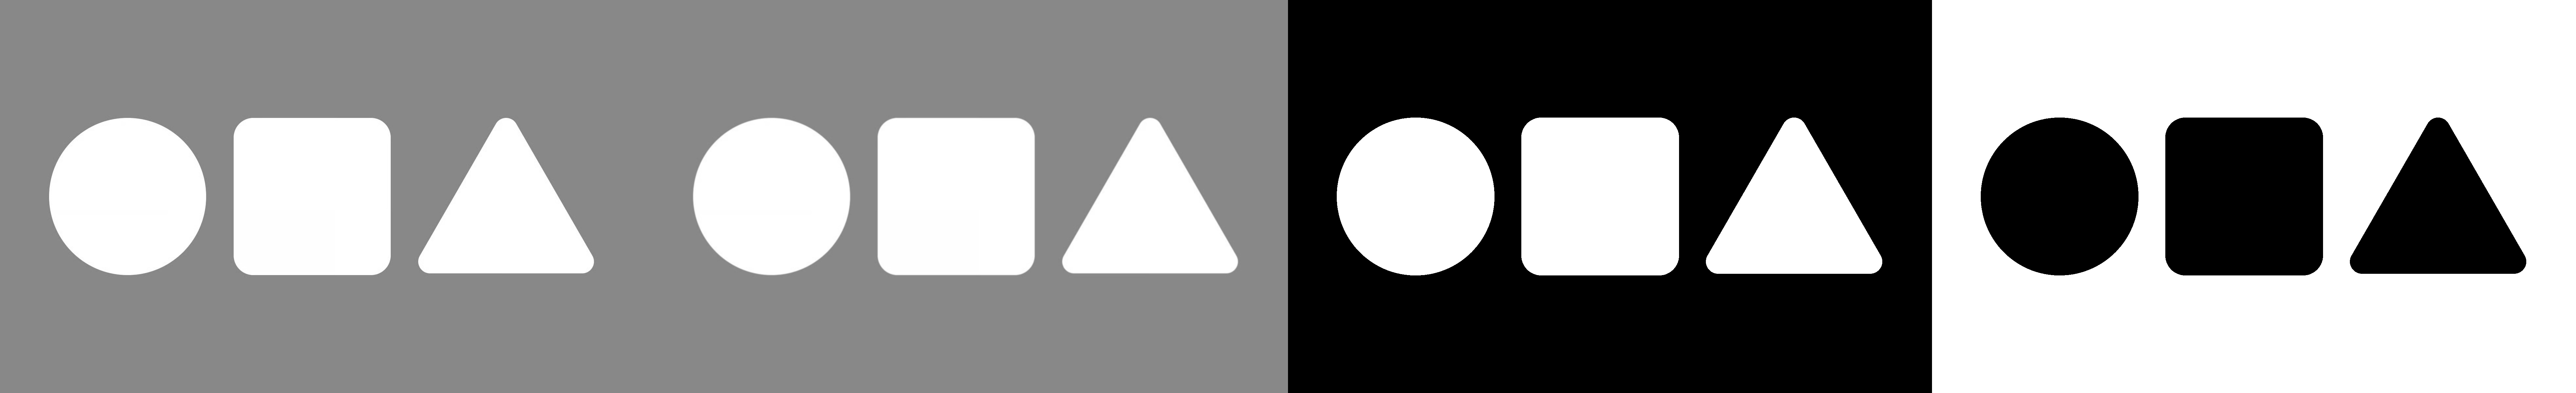

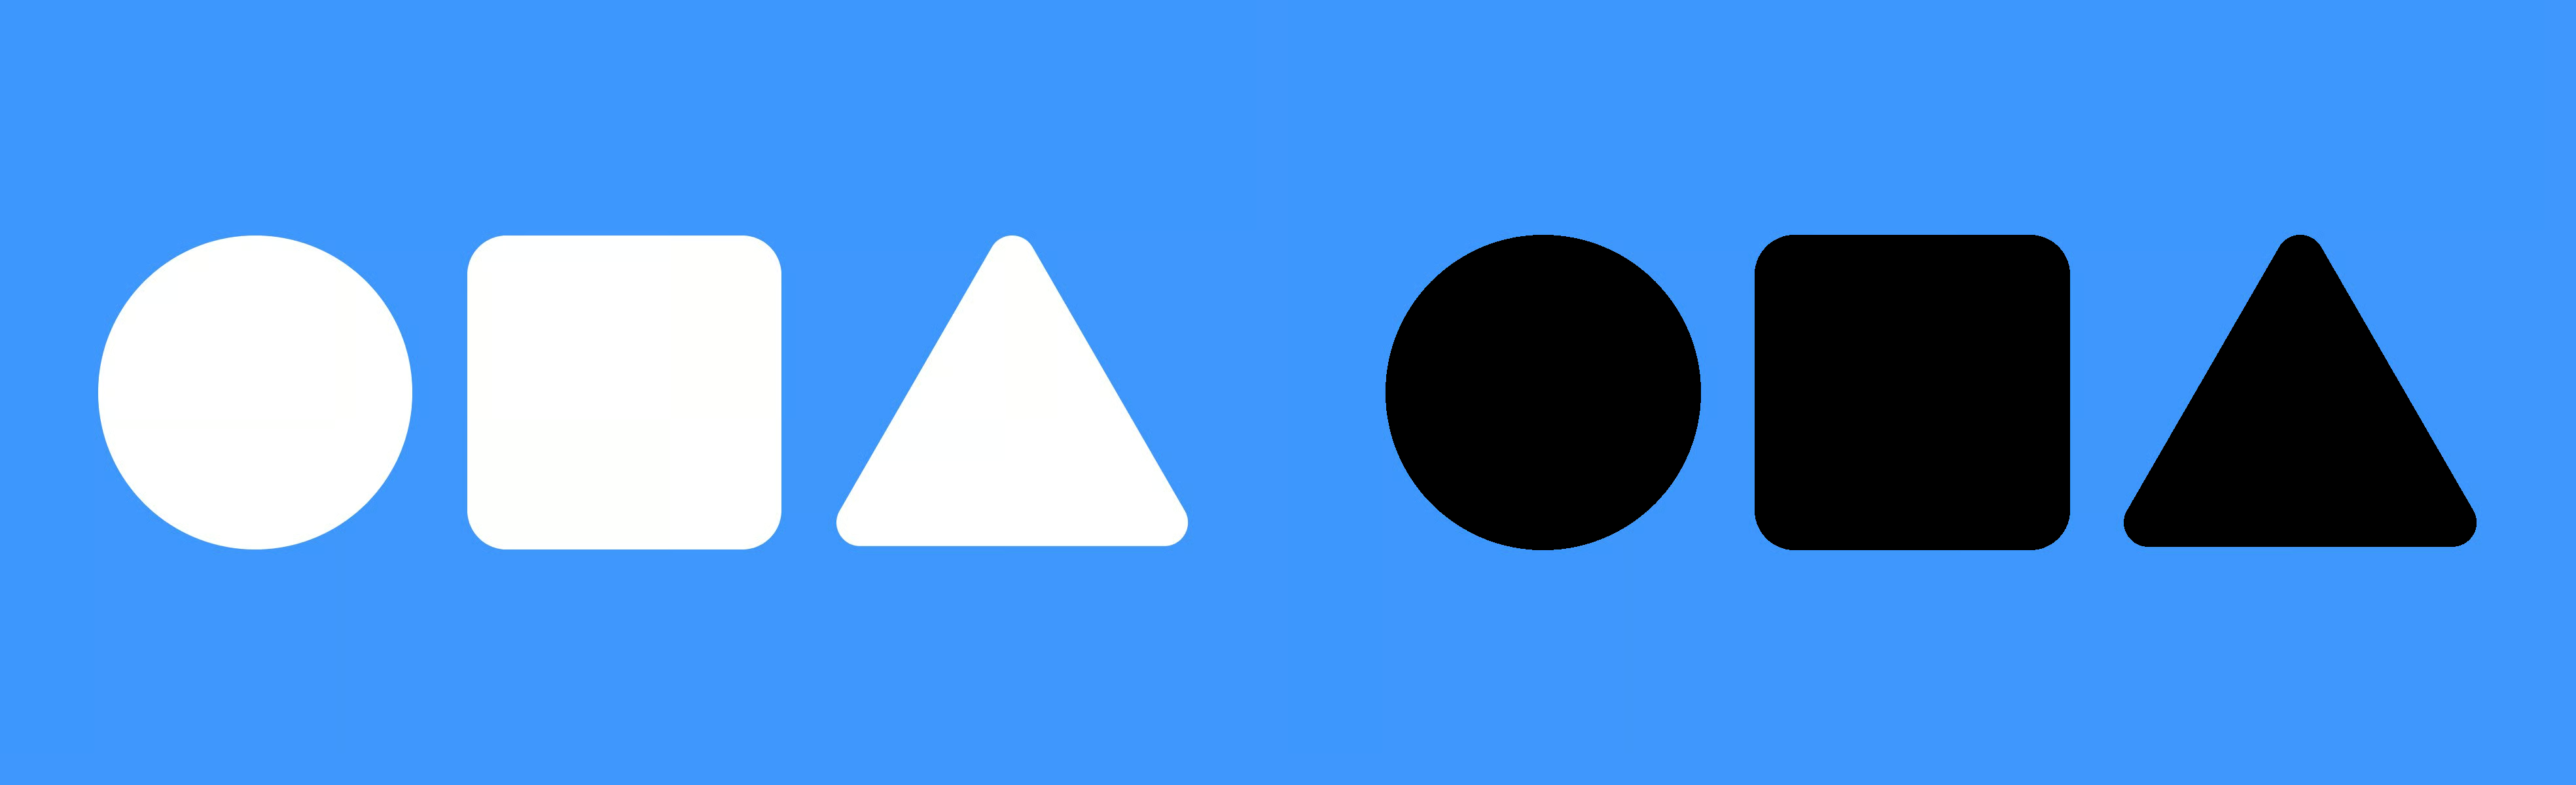

-1

In [26]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([gray, blurred, thresh, threshInv]))
cv2_imshow(np.hstack([image, foreground]))
cv2.waitKey(0)

## ADAPTIVE THRESHOLDING

Drawbacks of Previous method
- Manually supply Threshold Value T
- Requires lots of experiments with different T

**Solution**: Adaptive Thresholding

Consider **small neighbors** of pixels and then find an **optimal threshold value** T for each neighbor

Useful
- High ranges of pixel intensities in the image
- Optimal value of T may change for different parts of the image

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Adaptive Threshold the image
- Display the image

#### Import the libraries

In [27]:
import cv2
import numpy as np

#### Load the image

In [28]:
image = cv2.imread("image.jpg")

#### Convert the image into grayscale

In [29]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [30]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.adaptiveThreshold( )**
    - image
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Method to compute the thresholding
        - **ADAPTIVE_THRESH_MEAN_C**
            - Compute the mean of the neighborhood of pixels and treat it as T
        - **ADAPTIVE_THRESH_GAUSSIAN_C**
            - Compute the Weighted mean of the neighborhood of pixels and treat it as T
    - Thresholding Method
        - **THRESH_BINARY_INV**
            - If any pixel greater than T in the neighborhood should be set to 255
            - If any pixel less than T, set to 0
    - Neighborhood size
        - Smaller square region for consideration to compute threshold
    - C
        - Integer that is subtracted from the mean allowing us to fine-tune our thresholding
    - Returns
        - T (manually set)
        - thresholded image

In [31]:
thresh = cv2.adaptiveThreshold(blurred,
                               255,
                               cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV,
                               11,
                               4
)

#### Display the Thresholded image

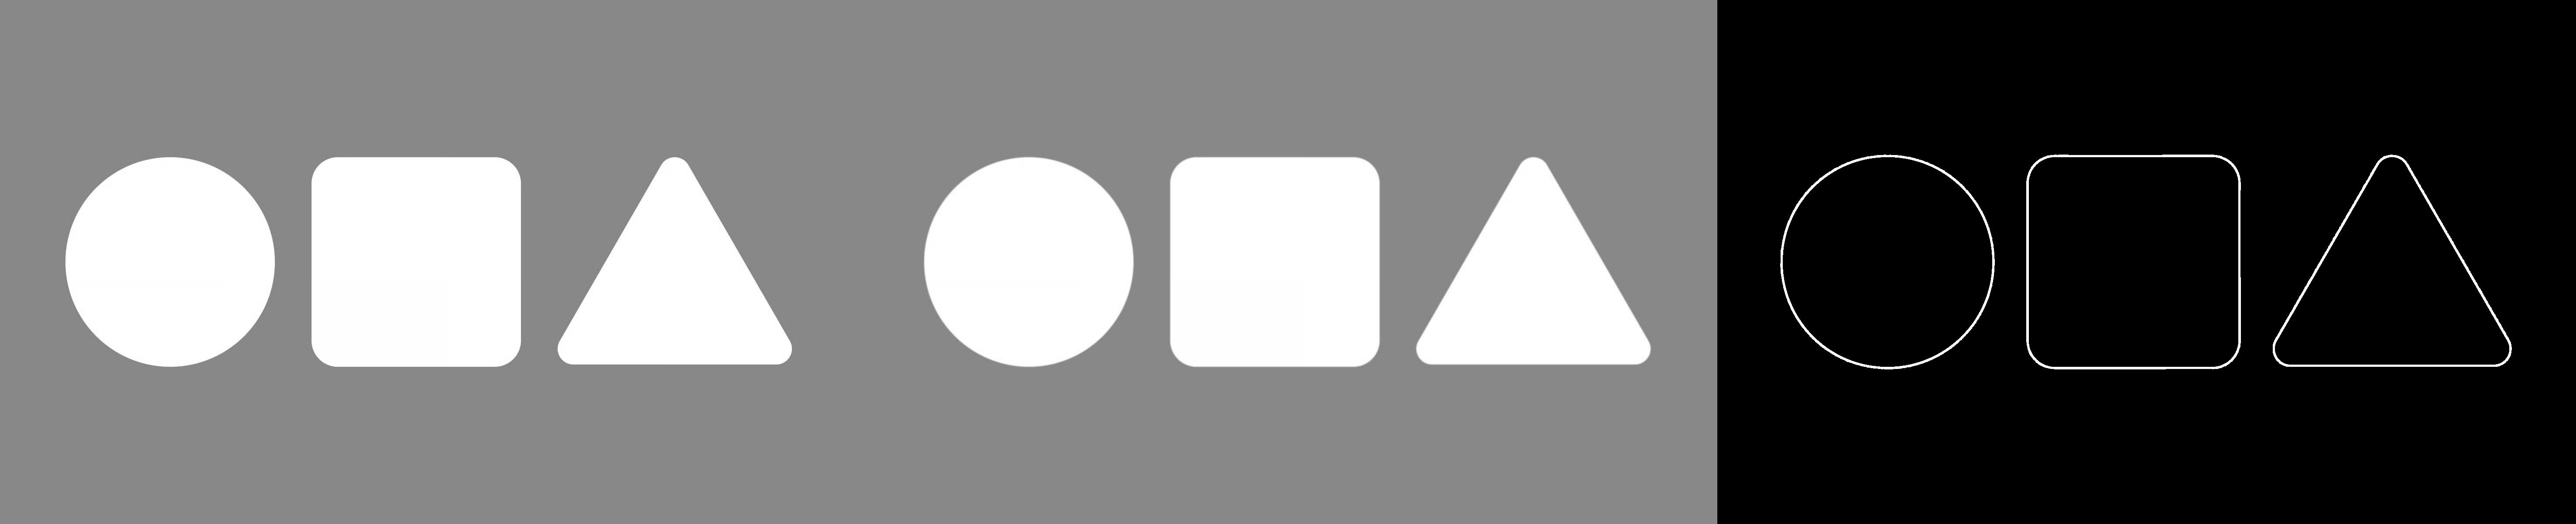

-1

In [38]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([gray, blurred, thresh]))
cv2.waitKey(0)

### Try Gaussian Thresholding

In [34]:
gaussianthresh = cv2.adaptiveThreshold(blurred,
                               255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV,
                               15,
                               3
)

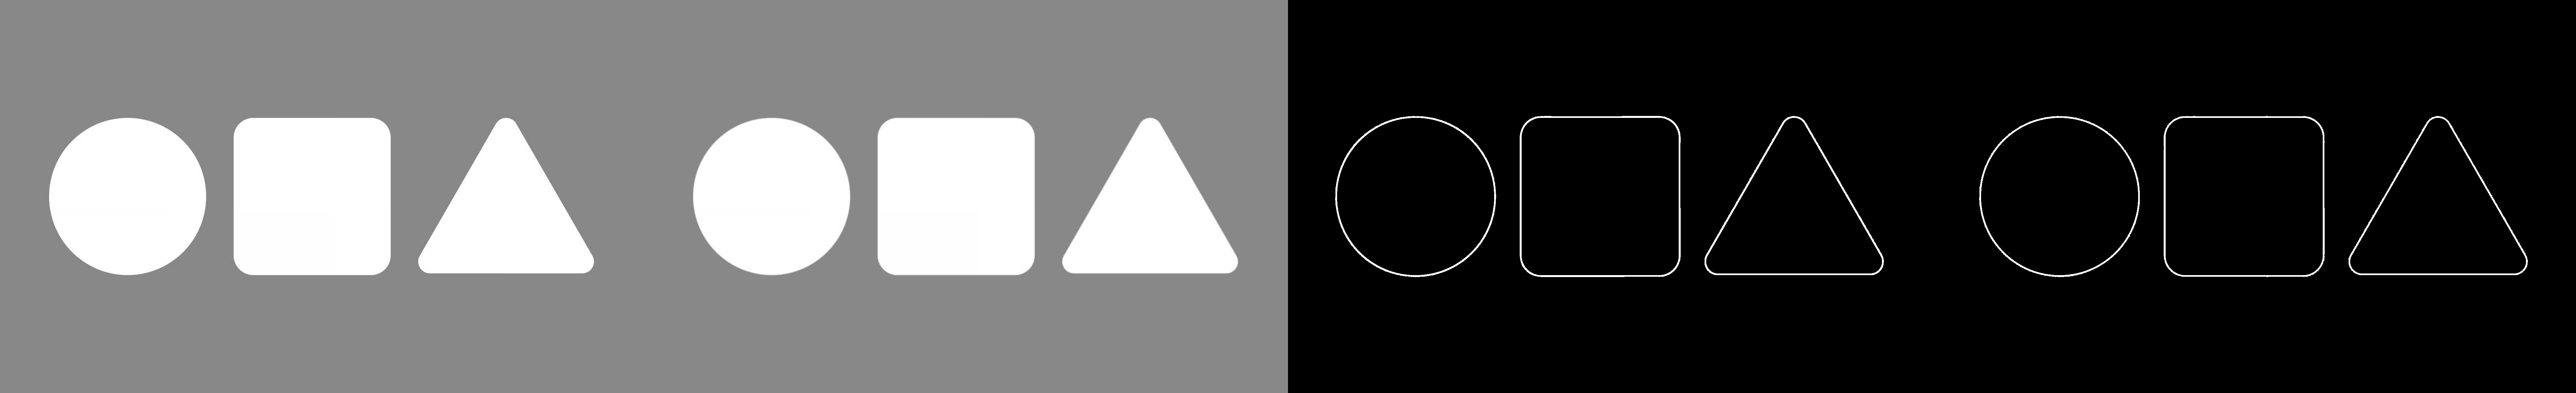

-1

In [35]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([gray, blurred, thresh, gaussianthresh]))
cv2.waitKey(0)

### Extract Foreground

In [36]:
foregroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

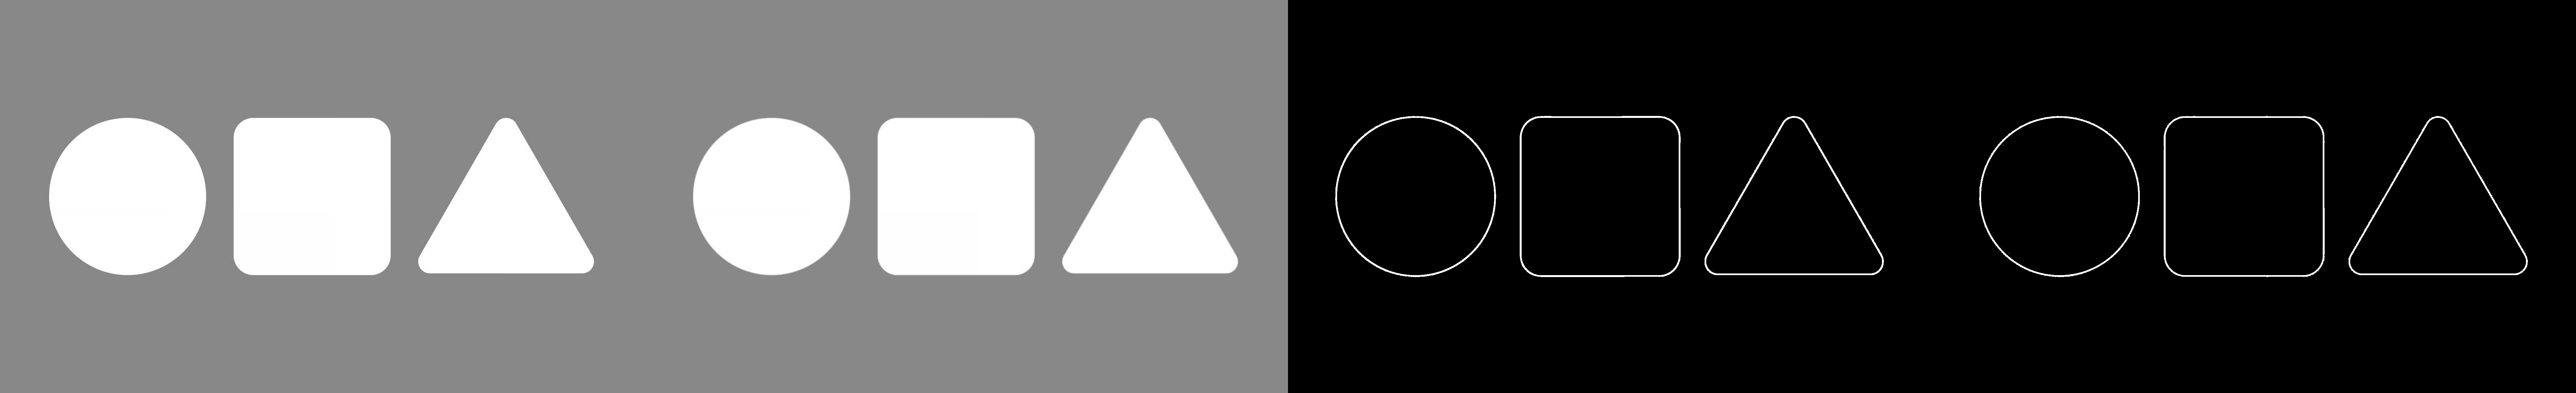

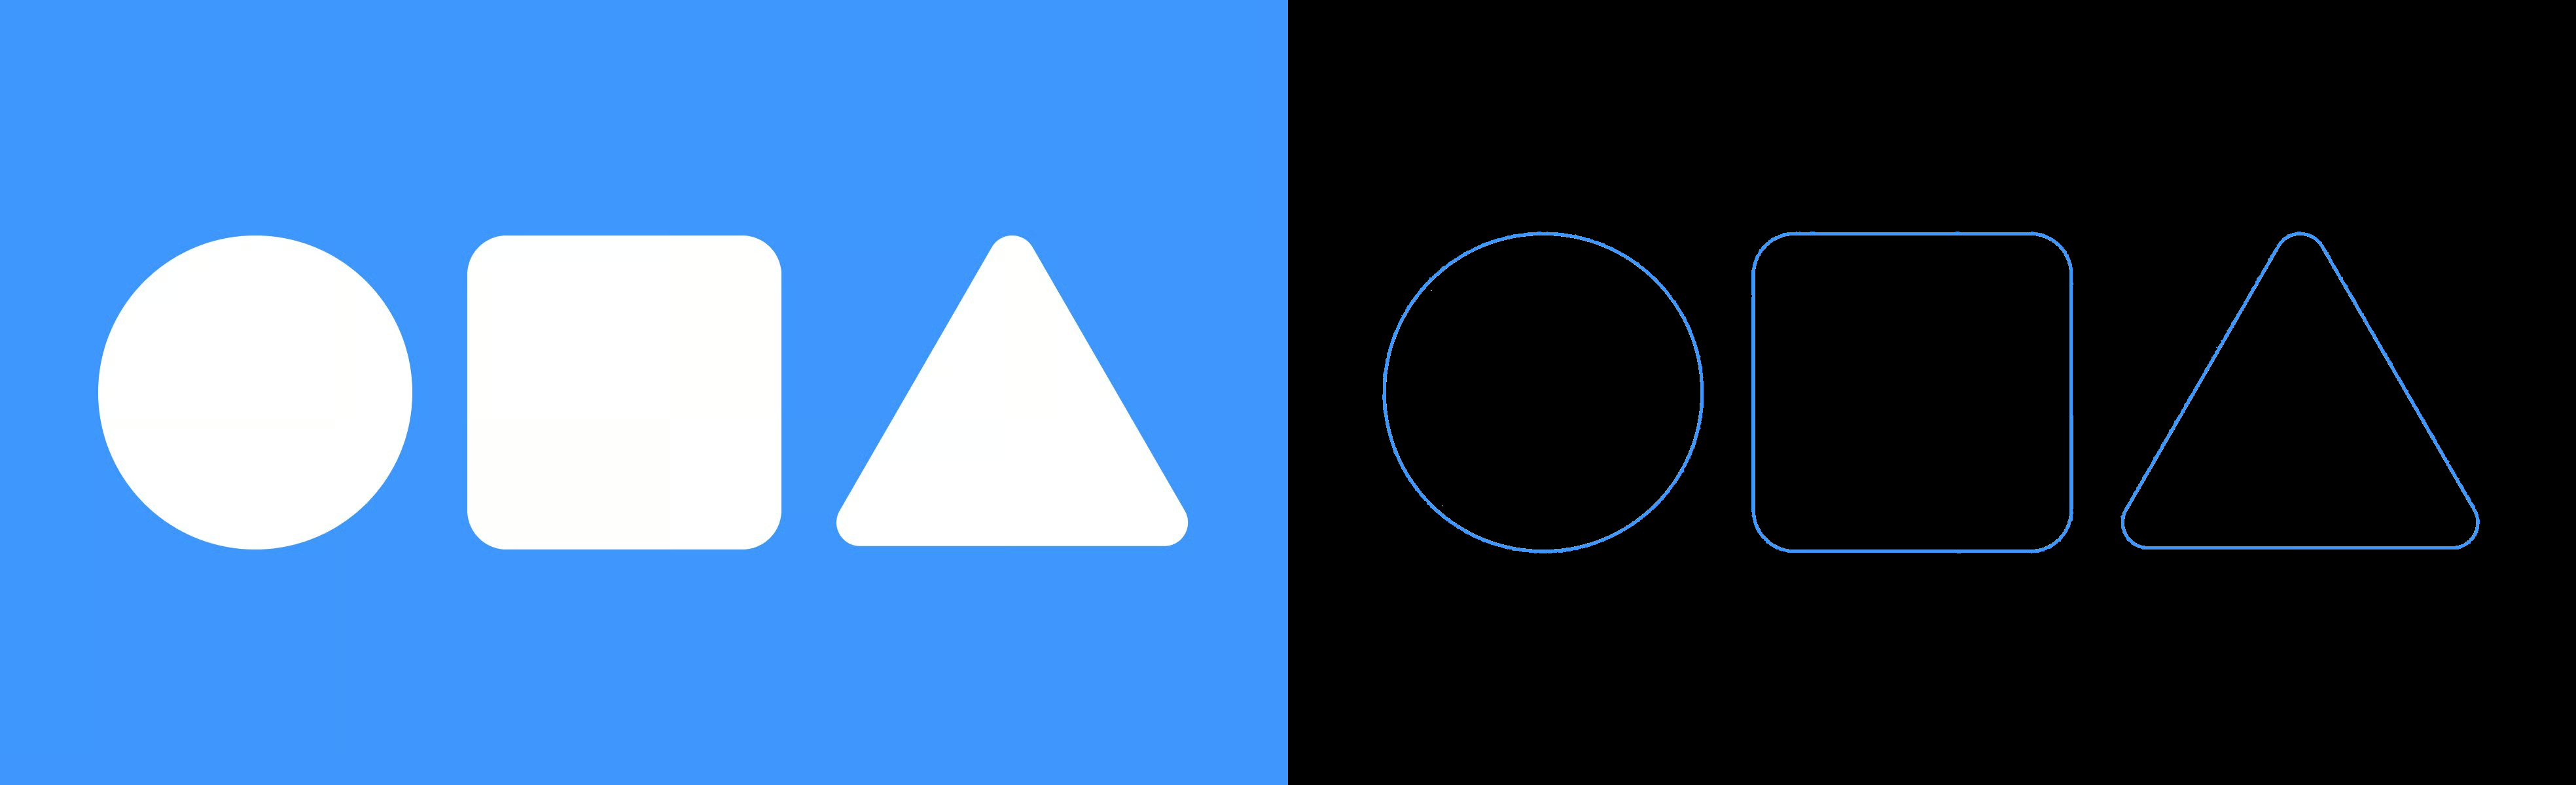

-1

In [40]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([gray, blurred, thresh, gaussianthresh]))
cv2_imshow(np.hstack([image, foregroundgaussian]))
cv2.waitKey(0)

## OTSU THRESHOLDING

Otsu’s method assumes there are **two peaks** in the grayscale histogram of the image
It then tries to find an optimal value to **separate** these two peaks – thus our value of T

Note: Please install **mahotas**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Otsu Threshold the image
- Display the image

#### Import the ncessary libraries

In [56]:
!pip install mahotas
import cv2
import numpy as np
import mahotas

#### Load the image

In [43]:
image = cv2.imread("image.jpg")

#### Convert the image into grayscale

In [44]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [45]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### OTSU Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**otsu**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

##### Find the optimal threshold of the image - Use OTSU

In [46]:
T = mahotas.thresholding.otsu(blurred)

##### What's the value of T?

In [47]:
T

195

#### Apply threshold
##### Copy the image

In [48]:
thresh = image.copy()

##### Set to white pixel if pixel intensity greater than T

In [49]:
thresh[thresh > T] = 255

##### Set to black pixel if pixel intensity less than 255

In [50]:
thresh[thresh < 255] = 0

##### Invert the thresholding
- Use cv2.bitwise_not

In [51]:
thresh = cv2.bitwise_not(thresh)

##### Display the image

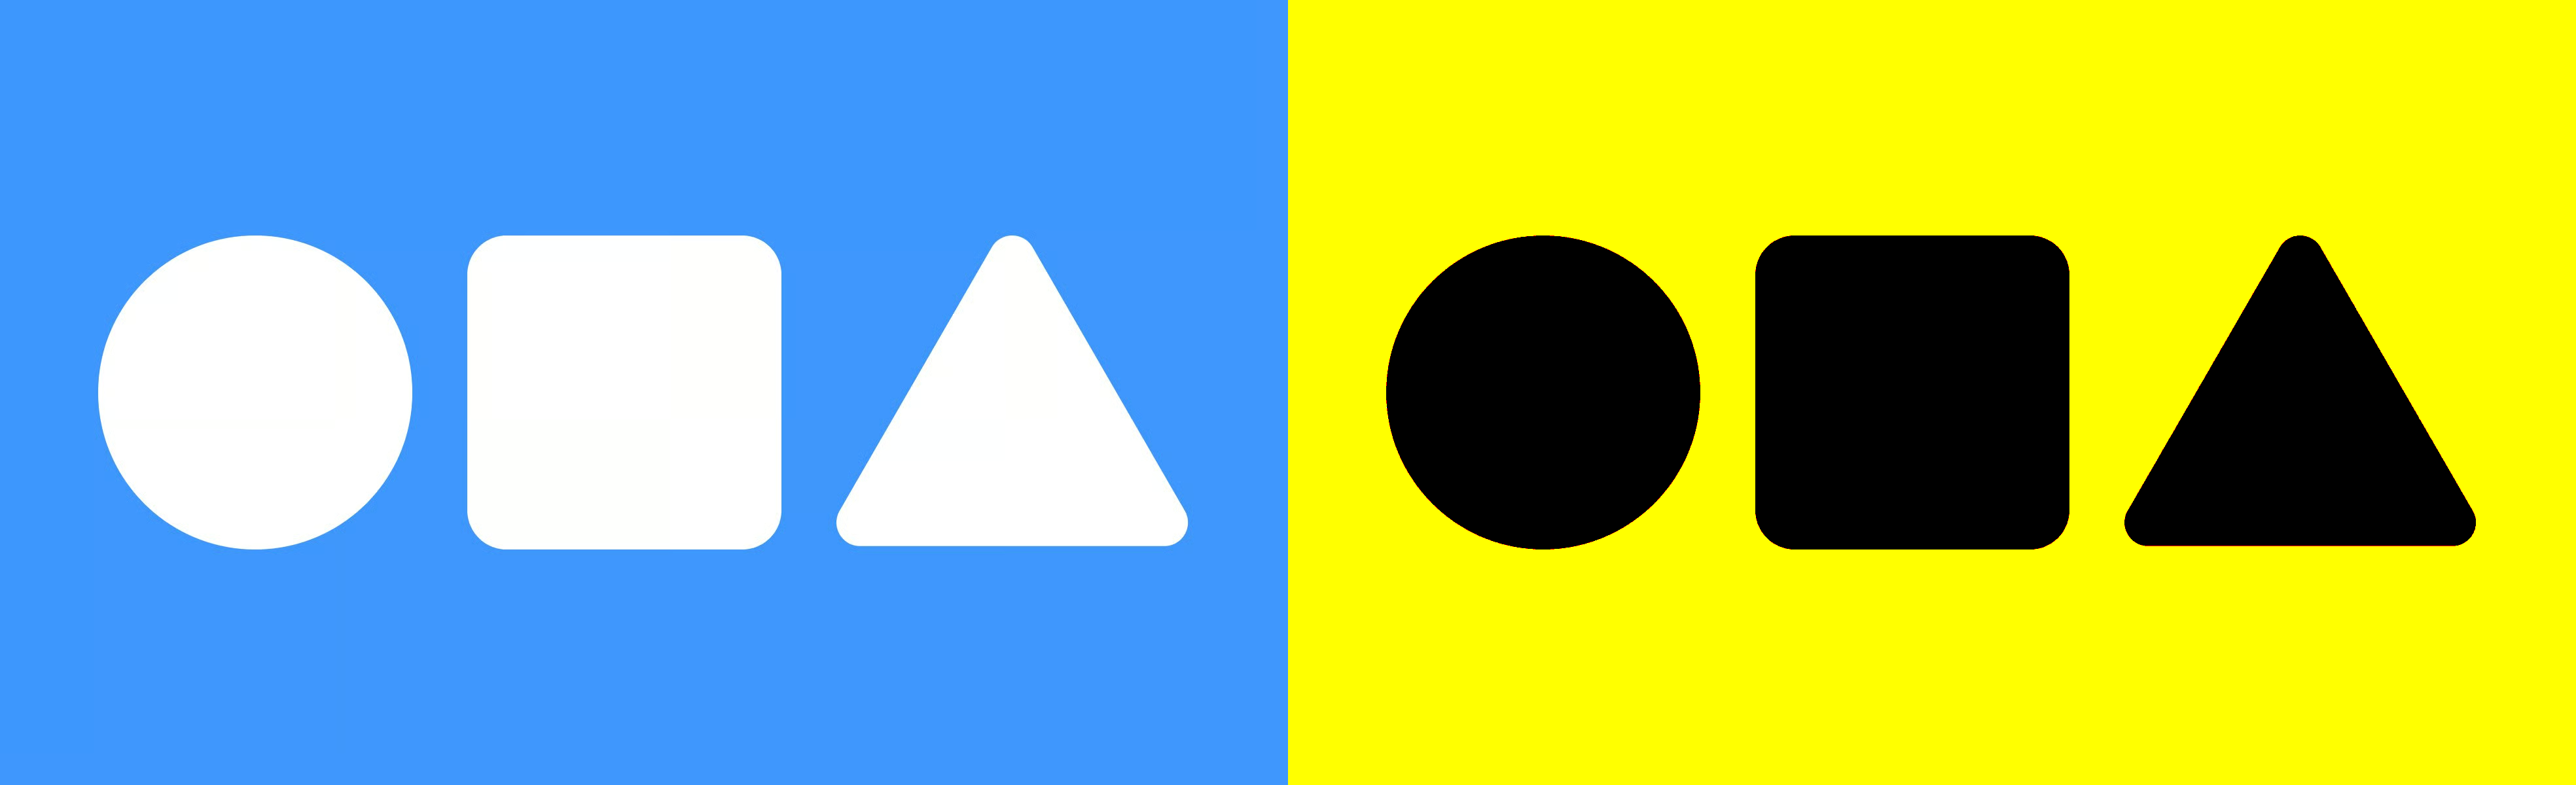

-1

In [65]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([image, thresh]))
cv2.waitKey(0)

## RIDDLER-CALVARD THRESHOLDING

#### RC Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**rc**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

In [59]:
T_RC = mahotas.thresholding.rc(blurred)

In [60]:
thresh_RC = image.copy()

In [61]:
thresh_RC[thresh_RC > T_RC] = 255

In [62]:
thresh_RC[thresh_RC < 255] = 0

In [63]:
thresh_RC = cv2.bitwise_not(thresh_RC)

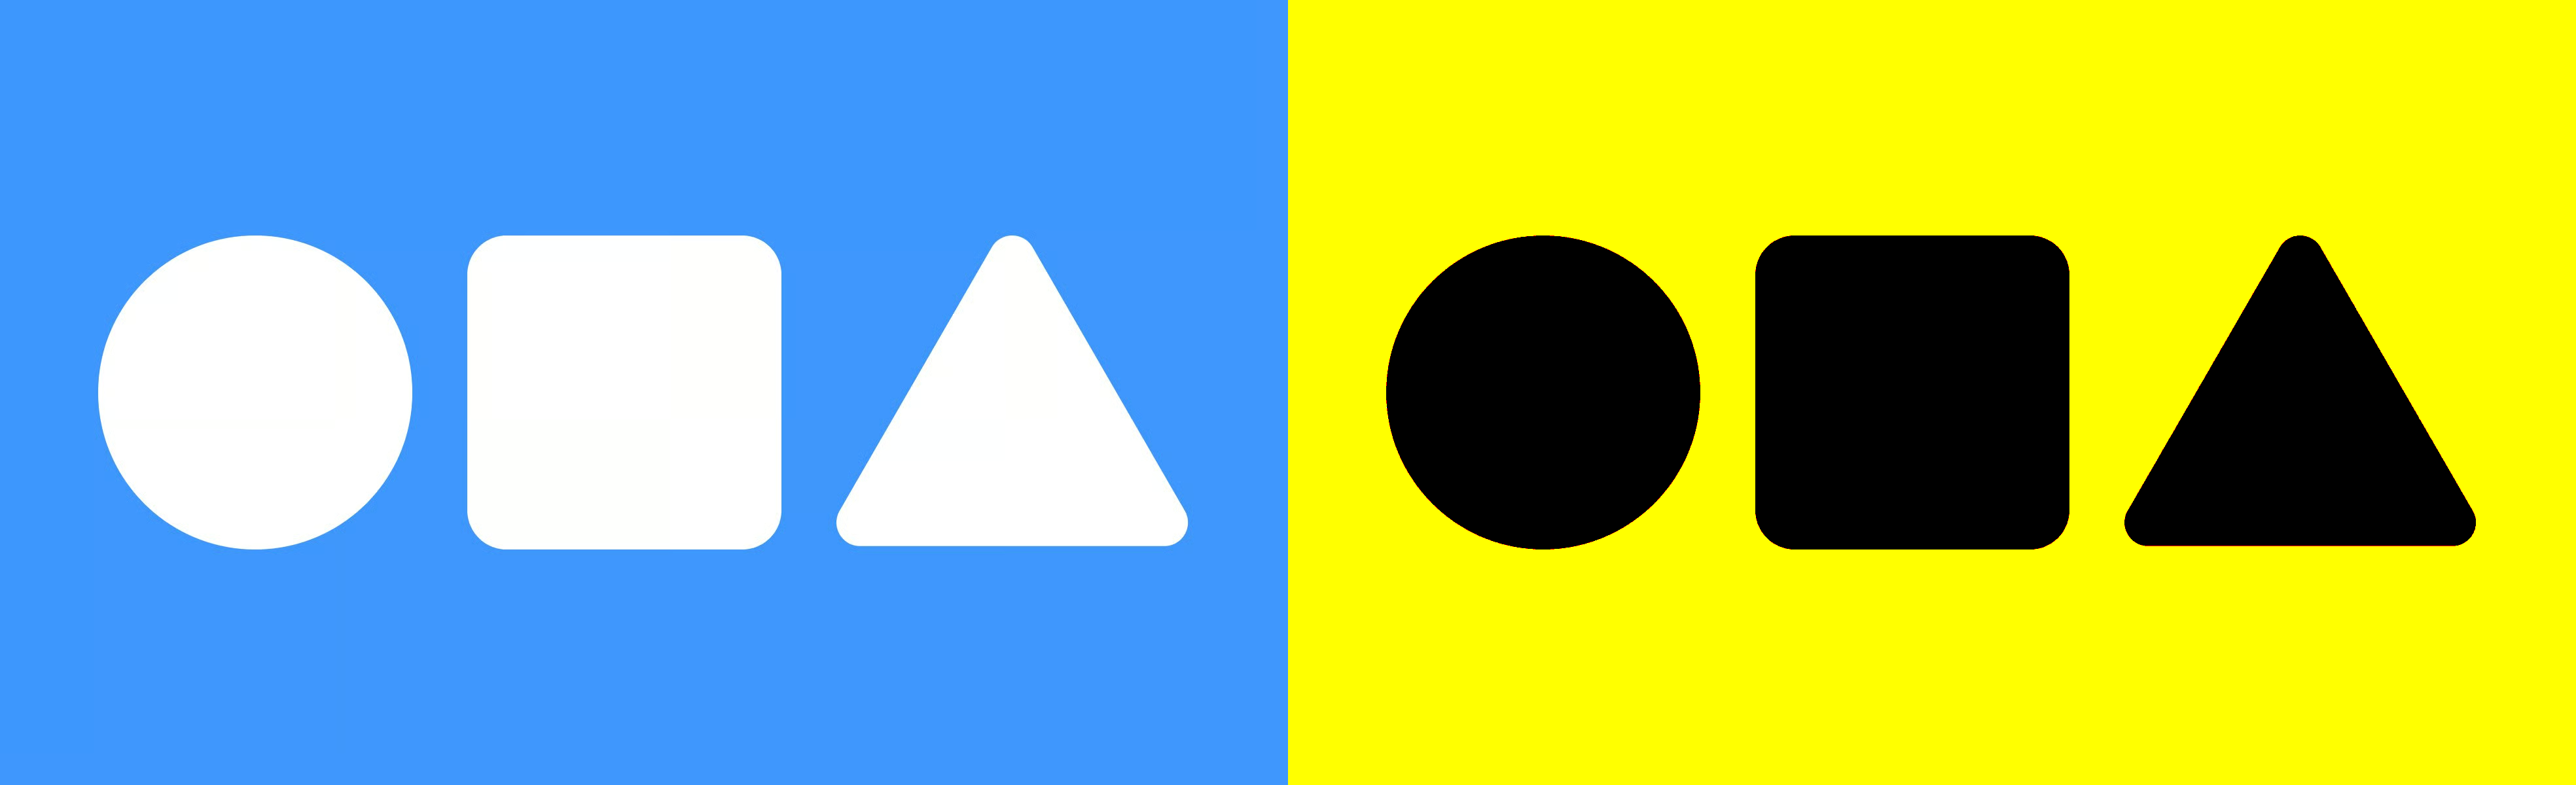

-1

In [64]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([image, thresh_RC]))
cv2.waitKey(0)